___
# MINIPROJETO 1

## <font color='red'>Felipe Scandiuzzi M. Netto - Turma 2C</font>
___

## <font color='blue'>IDADE MÉDIA DE CASAMENTO PARA AS MULHERES EM 2005</font>

___
## Itens 1 a 3 - Resolução:

In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from numpy import arange


print('Esperamos trabalhar no diretório')
print(os.getcwd())

dados = pd.read_excel('Idade.xlsx')
dados.head()

Esperamos trabalhar no diretório
C:\Users\felipe


,Idade
Afghanistan,17.839683
Albania,23.326509
Algeria,29.600000
Argentina,23.263962
Armenia,22.986034


In [22]:
dados.describe()

,Idade
count,175.000000
mean,24.528110
std,3.774071
min,17.600199
25%,21.798219
50%,23.565311
75%,27.352577
max,33.269535


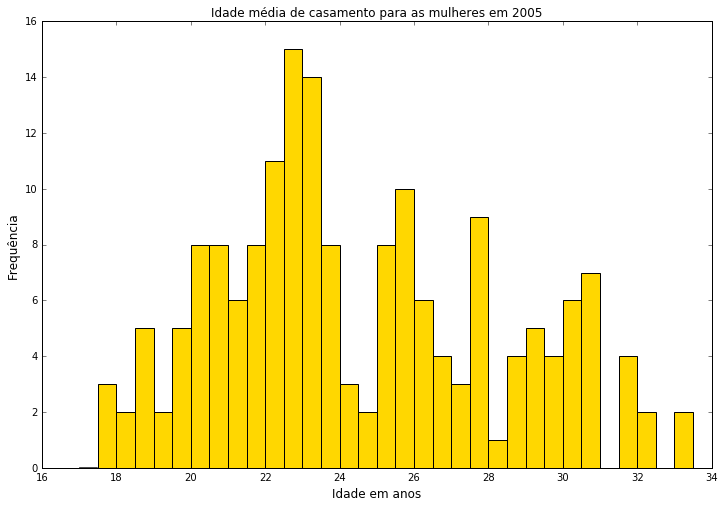

In [23]:
faixa = arange(17, 34, 0.5)
x = pd.cut(dados.Idade, faixa)
plot = dados.Idade.plot.hist(bins=faixa, figsize = (12,8),color = 'gold', title = 'Idade média de casamento para as mulheres em 2005')
plt.xlabel('Idade em anos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

___
## Itens 4 a 6 - Resolução:

## Gráficos das Distribuições Gamma e Alpha com parâmetros da função fit()

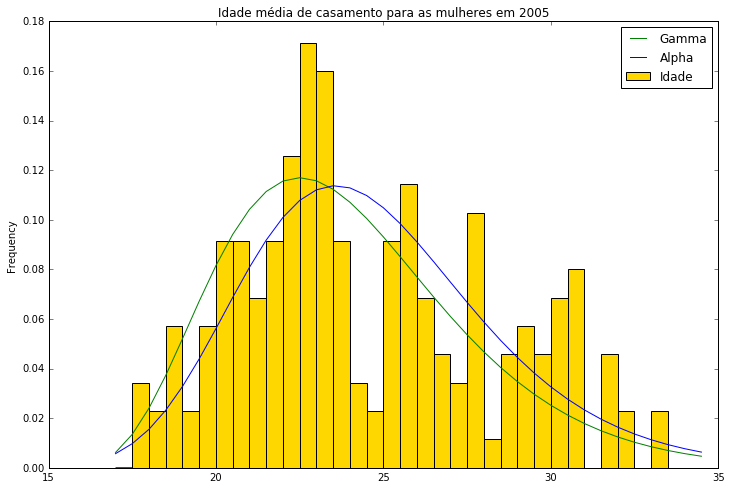

In [119]:
n = np.arange(17,35,0.5)
k_gama = 6.0
a_alpha = 9.0

plot = dados.Idade.plot.hist(bins=faixa, figsize = (12,8),color = 'gold', title = 'Idade média de casamento para as mulheres em 2005', normed=1)
gamma = stats.gamma.pdf(n, scale=1.5, loc=15, a=k_gama)
alpha = stats.alpha.pdf(n, scale=291, loc=-8, a=a_alpha)
plt.plot(n, gamma, '-', color='green', label="Gamma")
plt.plot(n, alpha, '-', color='blue', label="Alpha")
plt.legend()

In [91]:
gamafit = stats.gamma.fit(dados.Idade)
print("Parâmetros da função fit() na distribuição Gamma: {0}".format(gamafit))
alphafit = stats.alpha.fit(dados.Idade)
print("Parâmetros da função fit() na distribuição Alpha: {0}".format(alphafit))

Parâmetros da função fit() na distribuição Gamma: (6.1800114690984014, 14.930428383865079, 1.5530202865052187)
Parâmetros da função fit() na distribuição Alpha: (8.9596314565120334, -8.4606524472943718, 291.83082844496312)


In [110]:
d = dados.Idade.mean()
d

24.52811033553514

___
### Itens 7 a 9 - Resolução:

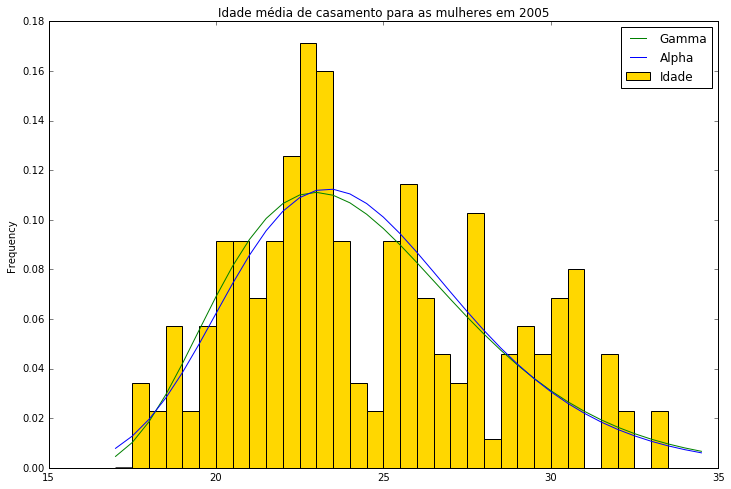

In [84]:
n = np.arange(17,35,0.5)

plot = dados.Idade.plot.hist(bins=faixa, figsize = (12,8),color = 'gold', title = 'Idade média de casamento para as mulheres em 2005', normed=1)
gamma = stats.gamma.pdf(n, scale=gamafit[2], loc=gamafit[1], a=gamafit[0])
alpha = stats.alpha.pdf(n, scale=alphafit[2], loc=alphafit[1], a=alphafit[0])
plt.plot(n, gamma, '-', color='green', label="Gamma")
plt.plot(n, alpha, '-', color='blue', label="Alpha")
plt.legend()

## Q-Q Plot

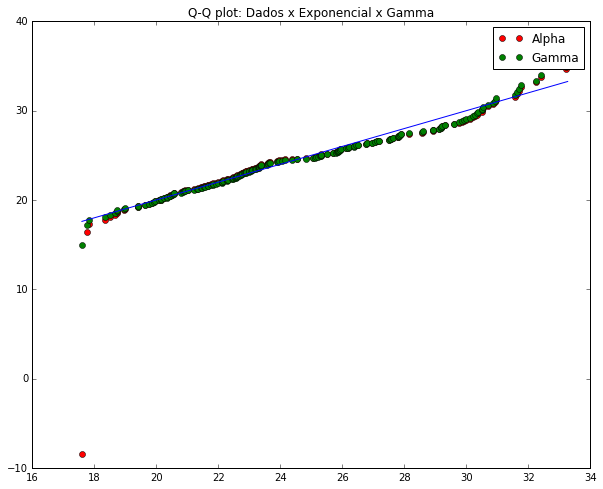

In [121]:
Idade = sorted(dados.Idade)
fra = [] 
for i in range(len(Idade)):
    acc = (i - 0.5) / len(Idade)
    if acc < 0:
        acc = 0
    fra.append(acc) 


fra = pd.Series(data=fra)


q_gamma = stats.gamma.ppf(fra, scale=gamafit[2], loc=gamafit[1], a=gamafit[0])
q_alpha = stats.alpha.ppf(fra, scale=alphafit[2], loc=alphafit[1], a=alphafit[0])


fig = plt.figure(figsize=(10,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

alpha_plot, = plt.plot(Idade, q_alpha, 'o', color="red", label="Alpha")
gamma_plot, = plt.plot(Idade, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[alpha_plot, gamma_plot])
plt.plot((min(Idade), max(Idade)), (min(Idade), max(Idade)), '-')

[]

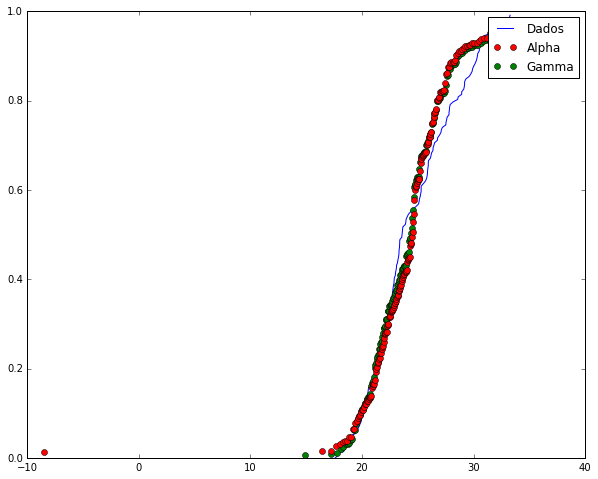

In [99]:
cdf_gamma = stats.gamma.cdf(Idade,  gamafit[0], gamafit[1], gamafit[2])
cdf_alpha = stats.alpha.cdf(Idade, alphafit[0], alphafit[1], alphafit[2])

fig = plt.figure(figsize=(10,8))

idade_plot, = plt.plot(Idade, fra, "-", label="Dados")
gamma_plot, = plt.plot(q_gamma, cdf_gamma, 'o', label = "Gamma")
alpha_plot, = plt.plot(q_alpha, cdf_alpha, 'o', label="Alpha")
plt.legend(handles=[idade_plot,alpha_plot, gamma_plot])

plt.plot()

___
### Itens 10 e 11 - Resolução:

## Teste de Aderência

[]

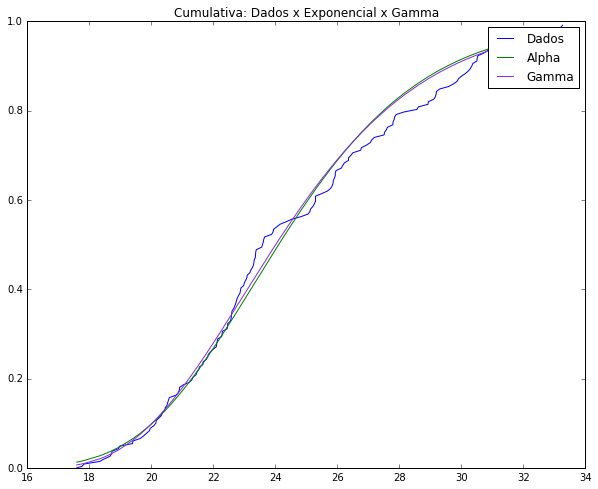

In [101]:
fig = plt.figure(figsize=(10,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

idade_plot, = plt.plot(Idade, fra, '-', label="Dados")
alpha_plot, = plt.plot(Idade, cdf_alpha, '-', label="Alpha")
gamma_plot, = plt.plot(Idade, cdf_gamma, '-', color="blueviolet", label = "Gamma")
plt.legend(handles=[idade_plot, alpha_plot, gamma_plot])
plt.plot()

In [134]:
# Erro quadrático nas CDFs
EqCDF_Gamma = sum((fra - cdf_gamma)**2)
EqCDF_Alpha = sum((fra - cdf_alpha)**2)

print("Erro quadrático da CDF da Gamma versus F.R.A", EqCDF_Gamma)
print("Erro quadrático da CDF da Alpha versus F.R.A", EqCDF_Alpha)


Erro quadrático da CDF da Gamma versus F.R.A 0.134250943363
Erro quadrático da CDF da Alpha versus F.R.A 0.17179340858


In [135]:
# Diferenças absolutas
SomaCDF_Gamma = sum( abs(fra - cdf_gamma))
SomaCDF_Alpha = sum( abs(fra - cdf_alpha))

print("Erro da soma do módulo das diferenças da Gamma versus F.R.A: {0} \nErro da soma do módulo das diferenças da Alpha versus F.R.A: {1}".format(SomaCDF_Gamma, SomaCDF_Alpha))

Erro da soma do módulo das diferenças da Gamma versus F.R.A: 3.952639731244349 
Erro da soma do módulo das diferenças da Alpha versus F.R.A: 4.34679655902182


In [137]:
# Kolmogorov-Smirnov goodness-of-fit test
KS_Gamma = max(abs(fra-cdf_gamma))
KS_Alpha = max(abs(fra-cdf_alpha))

print("Teste K-S para  Gamma = {:4.2f}: {:4.3f}\n\
Teste K-S para a Alpha com scale={:4.3f}, loc=0 e a={:4.3f}: {:4.3f}".format(d, KS_Gamma, gamafit[0], gamafit[2], KS_Alpha))

Teste K-S para  Gamma = 24.53: 0.057
Teste K-S para a Alpha com scale=6.180, loc=0 e a=1.553: 0.069


### Tabela 

|        Erro        |    Gamma   |   Alpha    |
|--------------------|------------|------------|
|     Quadrático     |   0.1342   |   0.1717   |
|Diferenças Absolutas|   3.9526   |   4.3467   |
| Kolmogorov-Smirnov |    0.057   |    0.069   |


Analisando os gráficos obtidos e a tabela acima podemos perceber que a distribuição Gamma mostrou-se um pouco mais correta para analisar a variável Idade média de casamento para as mulheres em 2005 quando comparada à distribuição Alpha.  